In [263]:
import time
import serial
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output

x = 0
num = 0

channel = []
rssi = []
lqi = []

ser = serial.Serial(
port='/dev/cu.usbserial-A50285BI',
baudrate=38400,
parity=serial.PARITY_NONE,
stopbits=serial.STOPBITS_ONE,
bytesize=serial.EIGHTBITS)

ser.close()
ser.open()
ser.isOpen()

ch = 255
rs = 255
lq = 255

while x < 1000:
    if ser.inWaiting() > 1:
        c = ser.read(1)
        c = int.from_bytes(c, "big")
        
        if c == 255:
            clear_output(wait=True)
            x = x+1
            print(x)
            num = 0
            if ch != 255 and rs != 255 & lq != 255:
                channel.append(ch)
                rssi.append(rs)
                lqi.append(lq)
            ch = 255
            rs = 255
            lq = 255
                
        else:
            if num == 0:
                ch = c
            elif num == 1:
                rs = c 
            elif num == 2:
                lq = c
            num = num + 1
            
ser.close()

1000


In [264]:
channel = list(map(lambda x: 779+(.405456543 * x), channel))
rssi = list(map(lambda x: (x/2)-74, rssi))

RSSI Max: 
RSSI   -41.0
LQI     65.0
Name: 846.305786138, dtype: float64

LQI Min: 
RSSI   -46.875
LQI     40.000
Name: 779.810913086, dtype: float64


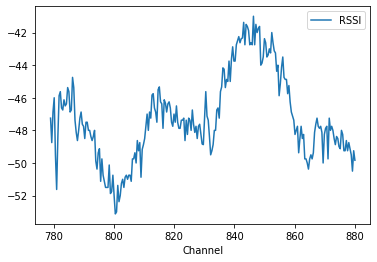

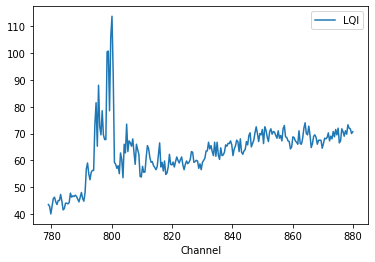

In [265]:
data = {'Channel': channel, 'RSSI': rssi, 'LQI': lqi}
df = pd.DataFrame(data, columns = ['Channel', 'RSSI', 'LQI'])

agg = df.groupby('Channel')[['RSSI', 'LQI']].mean()
print('RSSI Max: \n' + str(agg.loc[agg['RSSI'].idxmax()]))
print('\nLQI Min: \n' + str(agg.loc[agg['LQI'].idxmin()]))

agg.plot(y='RSSI')
agg.plot(y='LQI')
plt.show()